In [4]:
import pandas as pd            
import matplotlib.pyplot as plt               
import numpy as np            
import seaborn as sns            
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv('E:\Python\ML\laptop_price - dataset.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [6]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.0
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [8]:
df.shape

(1275, 15)

In [9]:
df.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Product'].nunique()

618

In [12]:
num_col = df.select_dtypes(include=['Float64','int64']).columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()
print(num_col)
print(cat_col)

['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']
['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']


In [13]:
le = preprocessing.LabelEncoder()
df['Company_code'] = le.fit_transform(df['Company'])
df['Product_code'] = le.fit_transform(df['Product'])
df['TypeName_code'] = le.fit_transform(df['TypeName'])
df['ScreenResolution_code'] = le.fit_transform(df['ScreenResolution'])
df['CPU_Company_code'] = le.fit_transform(df['CPU_Company'])
df['CPU_Type_code'] = le.fit_transform(df['CPU_Type'])
df['Memory_code'] = le.fit_transform(df['Memory'])
df['GPU_Company_code'] = le.fit_transform(df['GPU_Company'])
df['GPU_Type_code'] = le.fit_transform(df['GPU_Type'])
df['OpSys_code'] = le.fit_transform(df['OpSys'])

In [14]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,...,Company_code,Product_code,TypeName_code,ScreenResolution_code,CPU_Company_code,CPU_Type_code,Memory_code,GPU_Company_code,GPU_Type_code,OpSys_code
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,...,1,300,4,23,1,40,4,2,56,8
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,...,1,301,4,1,1,40,2,2,50,8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,...,7,50,3,8,1,46,16,2,52,4
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,...,1,300,4,25,1,54,29,0,76,8
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,...,1,300,4,23,1,40,16,2,57,8


In [15]:
df.dtypes

Company                   object
Product                   object
TypeName                  object
Inches                   float64
ScreenResolution          object
CPU_Company               object
CPU_Type                  object
CPU_Frequency (GHz)      float64
RAM (GB)                   int64
Memory                    object
GPU_Company               object
GPU_Type                  object
OpSys                     object
Weight (kg)              float64
Price (Euro)             float64
Company_code               int64
Product_code               int64
TypeName_code              int64
ScreenResolution_code      int64
CPU_Company_code           int64
CPU_Type_code              int64
Memory_code                int64
GPU_Company_code           int64
GPU_Type_code              int64
OpSys_code                 int64
dtype: object

Inches


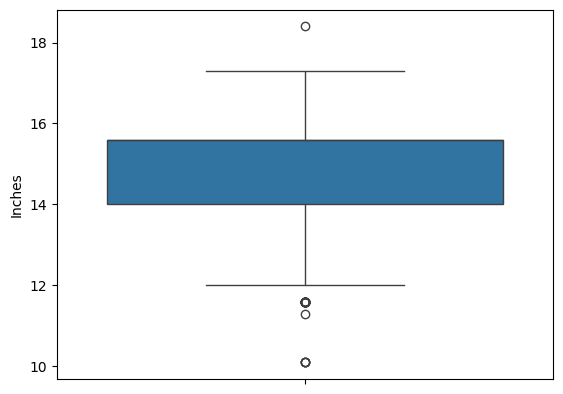

CPU_Frequency (GHz)


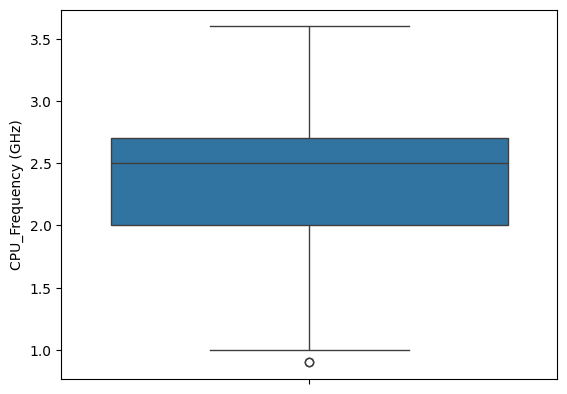

RAM (GB)


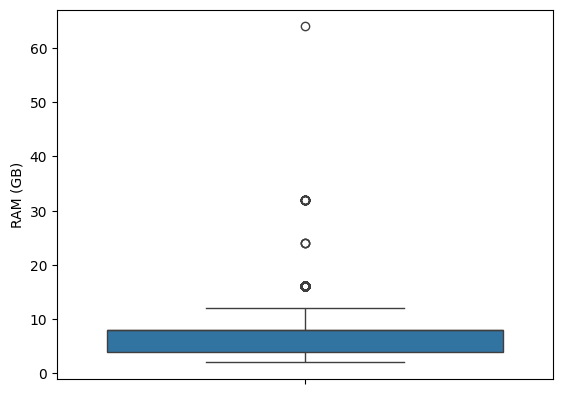

Weight (kg)


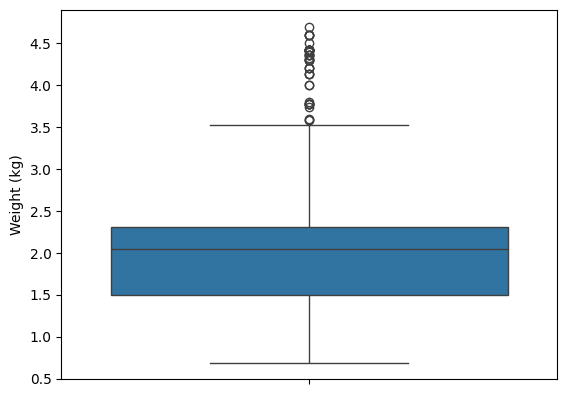

Price (Euro)


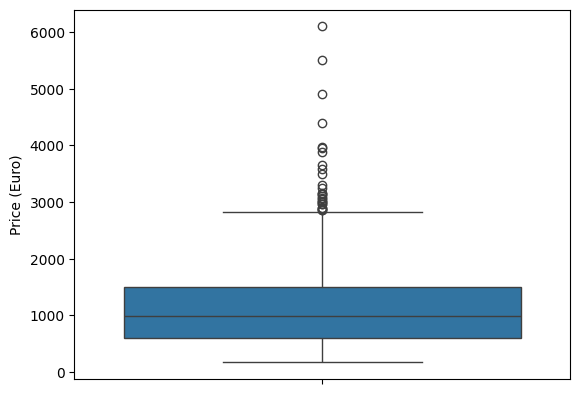

In [16]:
for col in num_col:
    print(col)

    sns.boxplot(df[col])
    plt.show()

<Axes: >

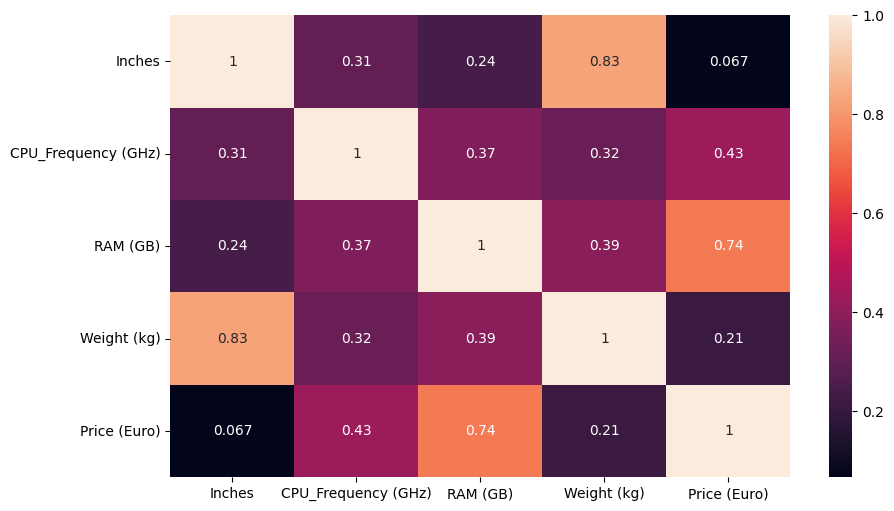

In [17]:
corr = df[num_col].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

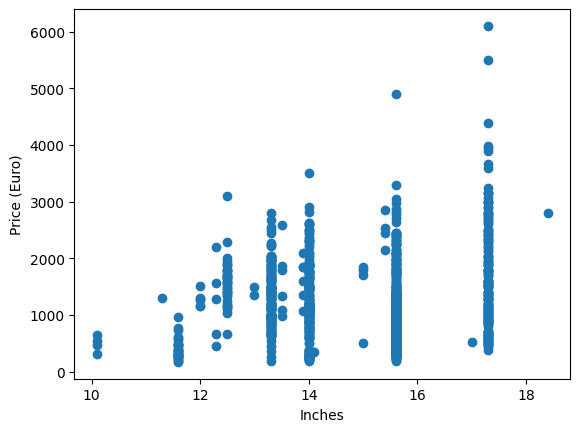

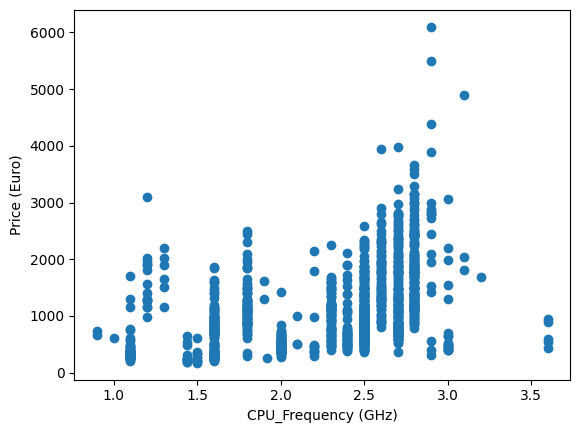

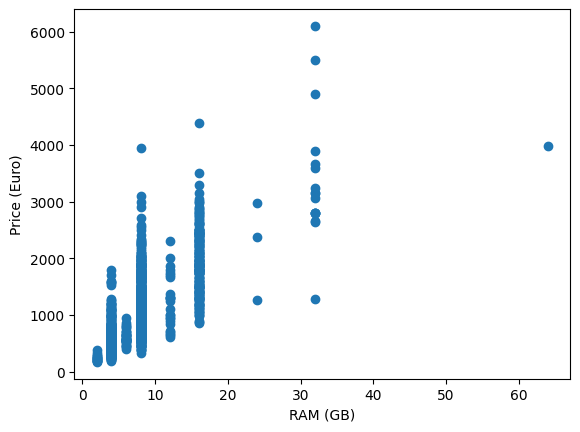

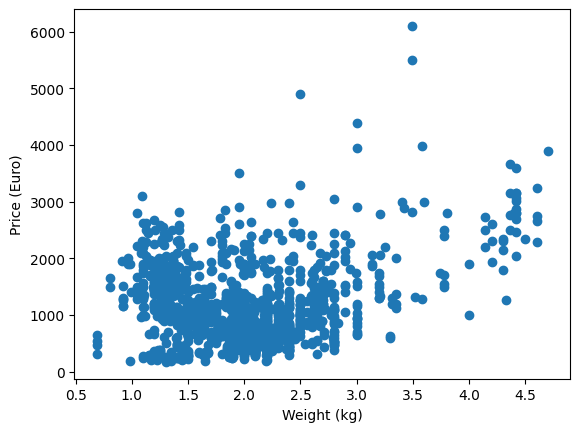

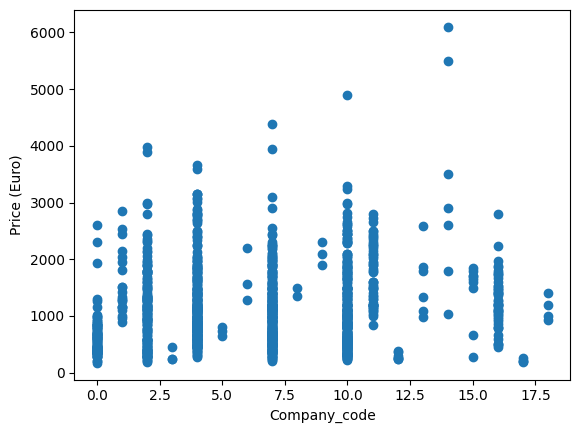

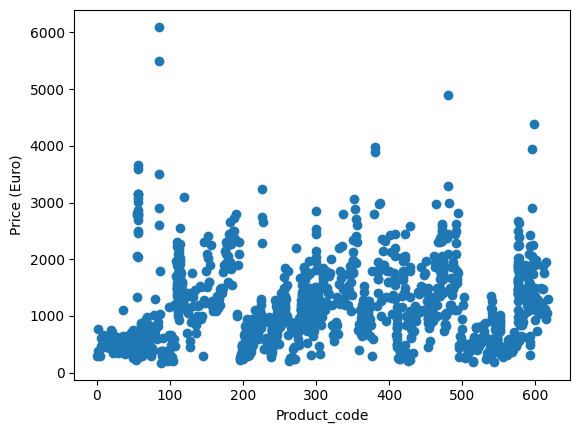

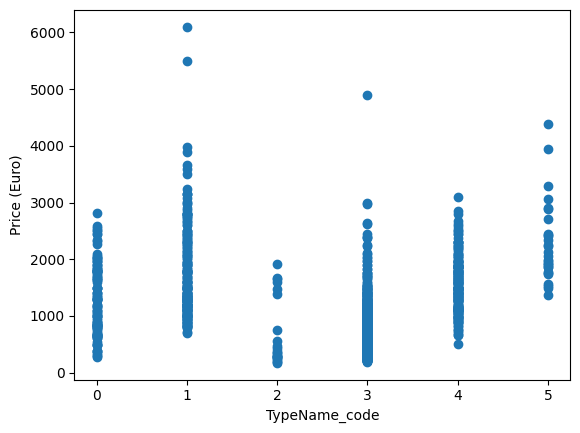

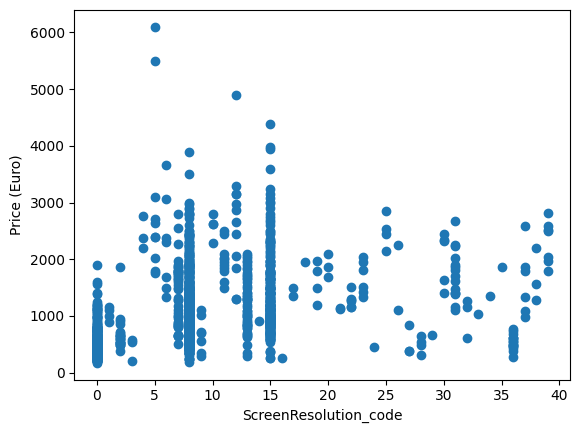

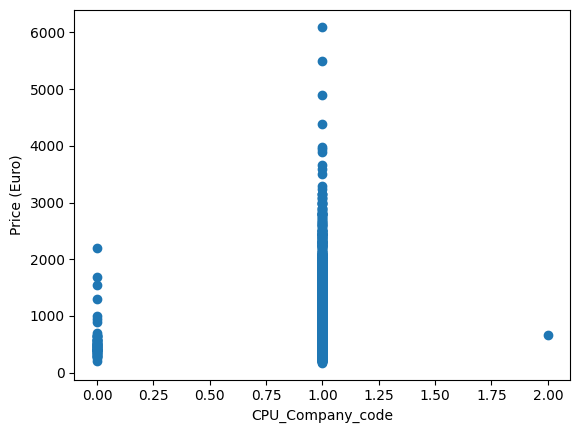

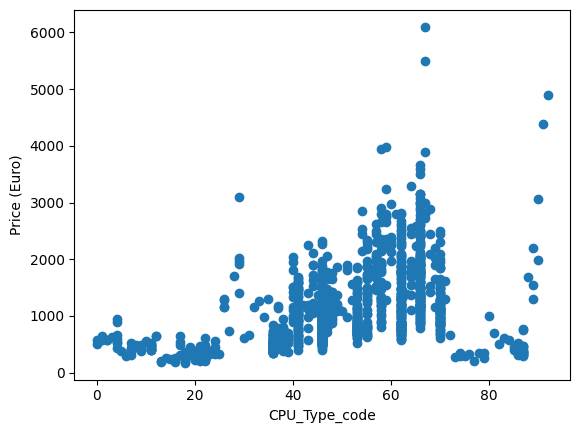

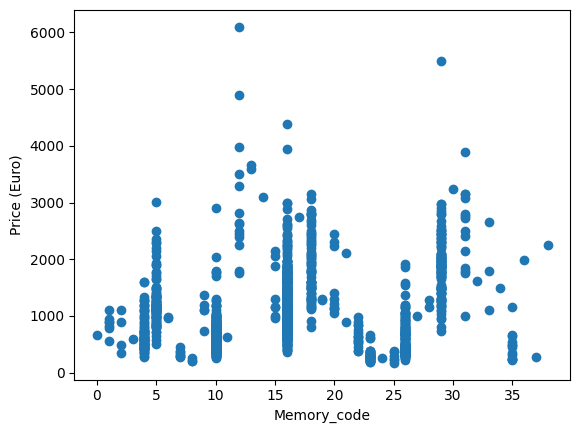

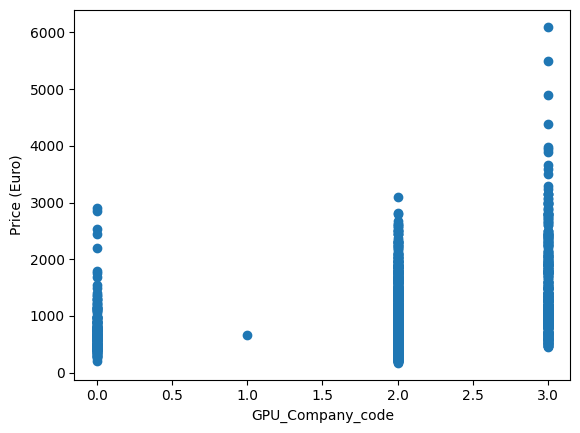

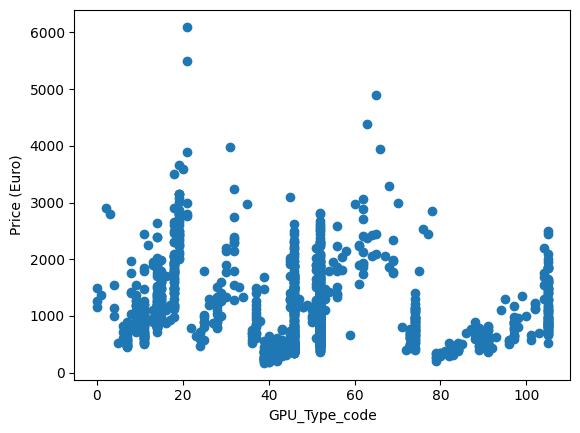

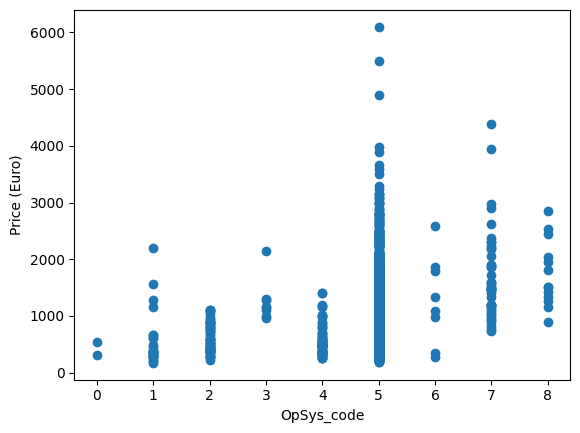

In [18]:
col = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Company_code', 'Product_code', 'TypeName_code', 'ScreenResolution_code', 'CPU_Company_code', 'CPU_Type_code', 'Memory_code', 'GPU_Company_code', 'GPU_Type_code', 'OpSys_code']
for col in col:
    plt.scatter(x=df[col],y=df['Price (Euro)'])
    plt.xlabel(col)
    plt.ylabel('Price (Euro)')
    plt.show()

In [19]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)',
       'Company_code', 'Product_code', 'TypeName_code',
       'ScreenResolution_code', 'CPU_Company_code', 'CPU_Type_code',
       'Memory_code', 'GPU_Company_code', 'GPU_Type_code', 'OpSys_code'],
      dtype='object')

In [21]:
X = np.array(df['RAM (GB)']).reshape(-1,1)
Y = np.array(df['Price (Euro)']).reshape(-1,1)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test)

In [26]:
r2 = r2_score(Y_test,y_pred)
r2

0.5417746741016412

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

lin2=LinearRegression()
lin2.fit(X_poly,Y_train)

LinearRegression()

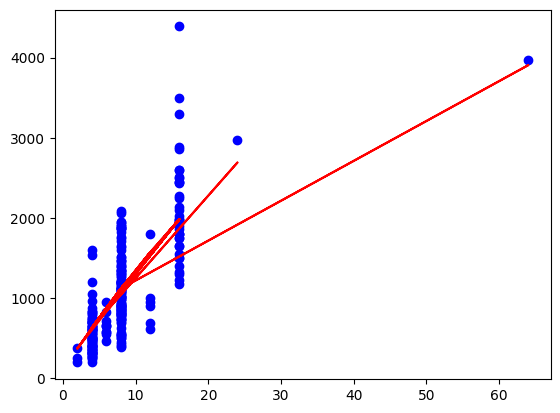

In [31]:
plt.scatter(X_test,Y_test, color='b')
plt.plot(X_test,lin2.predict(poly.fit_transform(X_test)), color='r')

In [32]:
for i in range(1,50):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)

    lin2=LinearRegression()
    lin2.fit(X_poly,Y_train)

    r2 = r2_score(Y_test,lin2.predict(poly.fit_transform(X_test)))

    if r2>0.48:
        print(r2,i)

0.5417746741016412 1
0.6234811718221495 2


In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(3.1394816926065114e+21)

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(2.5133680510439185e+45)

In [35]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(5.01335022818466e+22)